##Importing the dependencies

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import zipfile
import os 
import pandas as pd
#!pip install tensorflow-gpu

##Unzippig the data to take a look at the data and use it for trainning and testing
`pizza_steak.zip` has been uploaded .

In [ ]:
from google.colab import drive
import io
drive.mount('/content/drive')
zip_ref = zipfile.ZipFile("drive/My Drive/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()
#!pip install tf-nightly

Mounted at /content/drive


In [ ]:
#Taking a look at the data
!ls pizza_steak
!ls pizza_steak/train/steak

test  train
1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
10988

##Going through the data

In [ ]:
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


##Getting the class names

In [ ]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create a list of class names from the subdirectories
print(class_names)

['pizza' 'steak']


#Let's visualize a image

In [ ]:
import random
def view_random_image(target_dir,target_class):
  #setup the target directory(we'll view images from here)
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read i the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape : {img.shape}") # show the shape of the image
  #return img

['819027.jpg']
image shape : (308, 512, 3)


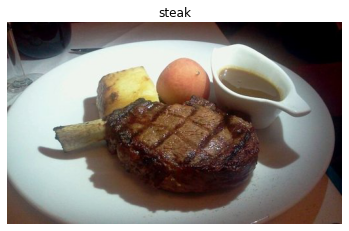

In [ ]:
view_random_image(target_dir = "pizza_steak/train/",
                  target_class = "steak")

##Plotting image side by side

['703556.jpg']
image shape : (512, 512, 3)
['2664219.jpg']
image shape : (512, 512, 3)


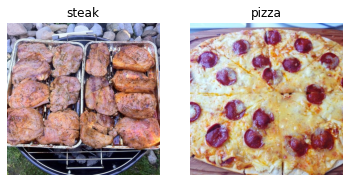

In [ ]:
#visulize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

##Defining the train and test data 
we need not to use split train and test data because it is already divided in dataset folder

In [ ]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

##Augmenting the data for better result

In [ ]:
#create train and test data generators and rescale the data.(Augmenting the traun data only.)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.) #This train data is not augmented , it will be used to compare data
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255.)

##Load in our image data and turn them into batches

In [ ]:
print("Non-Augmented Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary",
                                             shuffle = False) # this data is not Augmented

print("Augmented Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size =(224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")
 

Non-Augmented Data
Found 1500 images belonging to 2 classes.
Augmented Data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


##

In [ ]:
#Get sample data batches
images,labels=train_data.next()
augmented_images,augmented_labels = train_data_augmented.next() #labesl aren't augmented.

Showing Image number : 31


(-0.5, 223.5, 223.5, -0.5)

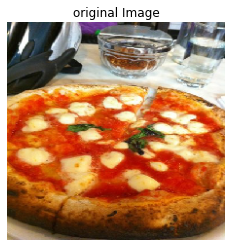

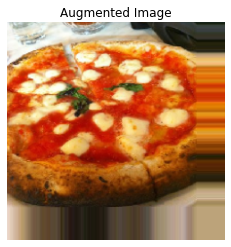

In [ ]:
import random
random_number = random.randint(0,31) #our batch size is 32
print(f"Showing Image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

##Building the model

In [ ]:
#strides=1,#number of steps the sliding window takes across an input
#tf.debugging.set_log_device_placement(True)

#1.) Creating the model
model_vision = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=7,#filter is the number of sliding windows going to across.
                    kernel_size=3,#Size of the sliding window going across the input.
                    activation="relu",#Non linear activation.
                    input_shape =(224,224,3)),#All image values are converted to this .
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(filters=7,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Conv2D(filters=7,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
                    
])

#2.) Compile the Model
model_vision.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

#3.) Fit the model
history_vision = model_vision.fit(train_data_augmented,
                 epochs=20,
                 steps_per_epoch = len(train_data_augmented),
                 validation_data = test_data,
                 validation_steps = len(test_data))

Epoch 1/20
47/47 [==============================] - 54s 1s/step - loss: 0.7027 - accuracy: 0.5000 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/20
47/47 [==============================] - 53s 1s/step - loss: 0.6899 - accuracy: 0.5240 - val_loss: 0.6860 - val_accuracy: 0.5800
Epoch 3/20
47/47 [==============================] - 51s 1s/step - loss: 0.6896 - accuracy: 0.5627 - val_loss: 0.6755 - val_accuracy: 0.6260
Epoch 4/20
47/47 [==============================] - 53s 1s/step - loss: 0.6865 - accuracy: 0.5760 - val_loss: 0.6505 - val_accuracy: 0.7740
Epoch 5/20
47/47 [==============================] - 52s 1s/step - loss: 0.6375 - accuracy: 0.6493 - val_loss: 1.1147 - val_accuracy: 0.5000
Epoch 6/20
47/47 [==============================] - 55s 1s/step - loss: 0.6791 - accuracy: 0.6267 - val_loss: 0.5727 - val_accuracy: 0.7920
Epoch 7/20
47/47 [==============================] - 51s 1s/step - loss: 0.6152 - accuracy: 0.6840 - val_loss: 0.5521 - val_accuracy: 0.7260
Epoch 8/20
47/47 [==

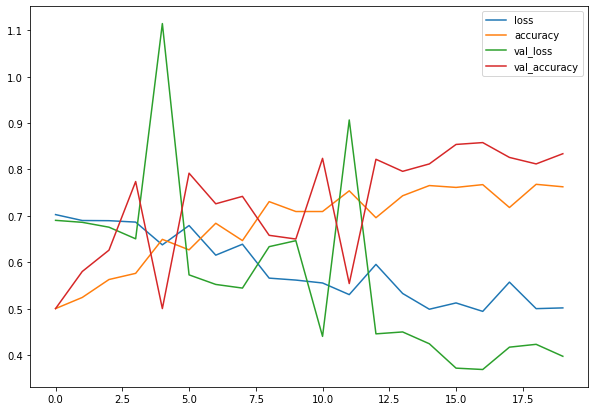

In [ ]:
#Plotting the trainning curves
pd.DataFrame(history_vision.history).plot(figsize=(10,7))

##Plotting Training and validation curves seperately

In [ ]:
def plot_loss_curves(history):
  '''Returns seperate loss curves for trainning and validation curves'''
  loss=history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"])) #For how much epochs we are running

  #Plotting loss
  plt.plot(epochs,loss,label="Training Loss")
  plt.plot(epochs,val_loss,label="Validation Loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plotting Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="Tranning accuracy")
  plt.plot(epochs,val_accuracy,label="Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


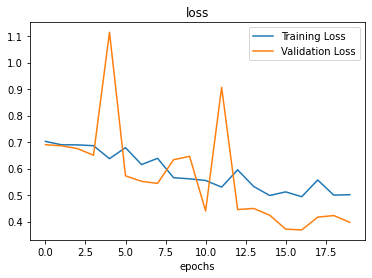

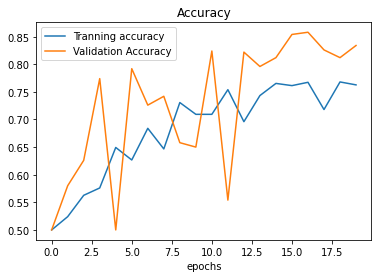

In [ ]:
plot_loss_curves(history_vision)

In [ ]:
print(class_names)

['pizza' 'steak']


##Testing the model by feeding image not from image set

To feed the image that is not from the imageset we have to change the dimension of the image.

In [ ]:
#Creating a function to load a image and change the dimension
def load_and_change(filename,img_shape=224):
  '''
  Reads an image from file name ,turns it into tensor and reshapes it,color channels'''
  #Reading the image
  img = tf.io.read_file(filename)

  #Decode the read file into tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])

  #Rescaling the image(get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
#Downloading a random image 
!wget https://images-gmi-pmc.edge-generalmills.com/b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg

--2022-09-19 18:40:51--  https://images-gmi-pmc.edge-generalmills.com/b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg
Resolving images-gmi-pmc.edge-generalmills.com (images-gmi-pmc.edge-generalmills.com)... 152.195.14.155
Connecting to images-gmi-pmc.edge-generalmills.com (images-gmi-pmc.edge-generalmills.com)|152.195.14.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73841 (72K) [image/jpg]
Saving to: ‘b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg’

b57ee35f-bce2-4229- 100%[===================>]  72.11K  --.-KB/s    in 0.008s  

2022-09-19 18:40:51 (8.64 MB/s) - ‘b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg’ saved [73841/73841]



In [ ]:
steak = load_and_change("b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8170643 , 0.428829  , 0.20529962],
        [0.80805576, 0.41982046, 0.19629103],
        [0.8122449 , 0.42400962, 0.20832334],
        ...,
        [0.92941177, 0.78431374, 0.67058825],
        [0.92156863, 0.7764706 , 0.6627451 ],
        [0.91764706, 0.77254903, 0.65882355]],

       [[0.8119773 , 0.4158989 , 0.19629103],
        [0.78935575, 0.39327732, 0.17366946],
        [0.8006352 , 0.40455684, 0.18494898],
        ...,
        [0.9263081 , 0.78121   , 0.6674845 ],
        [0.9249301 , 0.77983207, 0.6661066 ],
        [0.9122874 , 0.7671894 , 0.65346384]],

       [[0.8002351 , 0.39239198, 0.18864545],
        [0.80187327, 0.3940301 , 0.18618698],
        [0.8101516 , 0.40623   , 0.17877902],
        ...,
        [0.92431974, 0.7792217 , 0.66549623],
        [0.9249301 , 0.77983207, 0.6661066 ],
        [0.91238743, 0.7672894 , 0.6535639 ]],

       ...,

       [[0.3038973 , 0.08892915, 0.03264687],
        [0.43

#Predicting the image

In [ ]:
pred = model_vision.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.8886114]], dtype=float32)

#Creating a function to predict and plot the result


In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  '''importing the image predicting the image and plotting it'''
  #Import the target image and load it
  img = load_and_change(filename)

  #Make Prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the preducted class
  pred_class = class_names[int(tf.round(pred))]


  #Plot the image and predict the class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

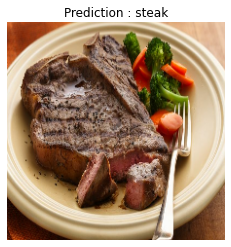

In [ ]:
#Testing out the model with custom image 
pred_and_plot(model_vision,"b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg")

In [ ]:
!wget "https://media-cdn.tripadvisor.com/media/photo-p/08/97/0e/32/domino-s-pizza.jpg"

--2022-09-19 18:40:51--  https://media-cdn.tripadvisor.com/media/photo-p/08/97/0e/32/domino-s-pizza.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44937 (44K) [image/jpeg]
Saving to: ‘domino-s-pizza.jpg’

domino-s-pizza.jpg  100%[===================>]  43.88K  --.-KB/s    in 0.006s  

2022-09-19 18:40:51 (6.77 MB/s) - ‘domino-s-pizza.jpg’ saved [44937/44937]



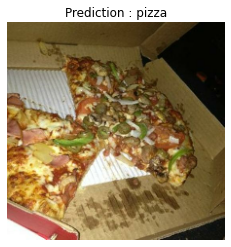

In [ ]:
pred_and_plot(model_vision,"domino-s-pizza.jpg")

In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg/800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg"

--2022-09-19 18:40:52--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg/800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139198 (136K) [image/jpeg]
Saving to: ‘800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg’

800px-Eq_it-na_pizz 100%[===================>] 135.94K  --.-KB/s    in 0.05s   

2022-09-19 18:40:52 (2.55 MB/s) - ‘800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg’ saved [139198/139198]



In [ ]:
pred_and_plot(model_vision,"800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg")

NotFoundError: ignored